# Introduction #

You'll build a model to predict hotel cancellations with a binary classifier.

In [1]:
!pip install matplotlib.pyplot
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

First, load the *Hotel Cancellations* dataset.

In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [34]:
X_train.shape

(89542, 63)

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [35]:
!pip install tensorflow.python

ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow.python


In [36]:
from tensorflow import keras
from tensorflow.keras import layers

input_dim=63
input_shape = (input_dim,) 

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Optional: compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_12          │ (None, 63)             │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,733 (330.99 KB)

 Trainable params: 83,583 (326.50 KB)

 Non-trainable params: 1,150 (4.49 KB)

# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [37]:
# YOUR CODE HERE
# 2) Add Optimizer, Loss, and Metric

model.compile(
    optimizer='adam',                # Adaptive learning optimizer
    loss='binary_crossentropy',      # For binary classification
    metrics=['binary_accuracy']      # Track accuracy during training
)

# Optional: confirm compilation worked
model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_12          │ (None, 63)             │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,733 (330.99 KB)

 Trainable params: 83,583 (326.50 KB)

 Non-trainable params: 1,150 (4.49 KB)

Finally, run this cell to train the model and view the learning curves. It may run for around 60 to 70 epochs, which could take a minute or two.

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.7724 - loss: 0.4818 - val_binary_accuracy: 0.8035 - val_loss: 0.4263
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8010 - loss: 0.4251 - val_binary_accuracy: 0.8147 - val_loss: 0.3974
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8072 - loss: 0.4117 - val_binary_accuracy: 0.8204 - val_loss: 0.3910
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8122 - loss: 0.4029 - val_binary_accuracy: 0.8205 - val_loss: 0.3865
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8142 - loss: 0.3982 - val_binary_accuracy: 0.8223 - val_loss: 0.3853
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8170 - loss: 0.3947 - val_binary_accuracy: 0.8234 - val_loss: 0.3814
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8169 - loss: 0.3908 - val_binary_accuracy: 0.8241 - val_loss: 0.3801

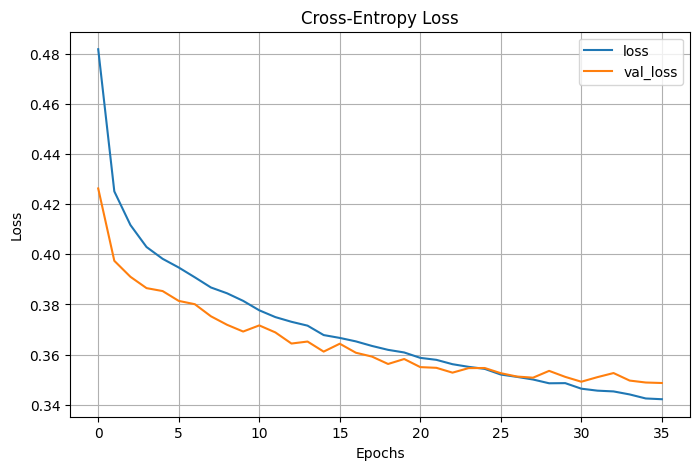

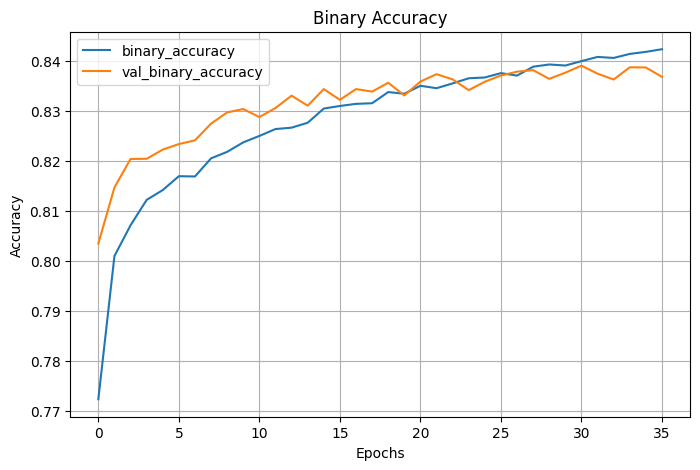

In [38]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Early stopping callback — stops training if validation loss doesn't improve
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,              # Stop after 5 epochs with no improvement
    min_delta=0.001,         # Minimum change to count as an improvement
    restore_best_weights=True  # Roll back to the best weights
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1
)

# Convert training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Plot cross-entropy loss
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-Entropy Loss", figsize=(8, 5))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Plot accuracy
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Binary Accuracy", figsize=(8, 5))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [39]:
print("Model expects:", model.input_shape)
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)


Model expects: (None, 63)
Train shape: (89542, 63)
Valid shape: (29848, 63)


# 3) Train and Evaluate #


What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?

In [40]:
import joblib

# Save preprocessor
joblib.dump(preprocessor, "preprocessor.pkl")

# Also save your model after training
model.save("Hotel_model.keras")
